Loops can be slow because of Python's dynamic structure. Each loop must do type checking and use CPython functions, adding time and computation, so for big loops, this is impactful on performance.

NumPy has functions optimized for vectors, essentially runing the function in a compiled manner.
Simply running a mathematical operation on a NumPy array takes advantage of the vectorization.

In [1]:
import numpy as np
a = np.arange(5)
a

array([0, 1, 2, 3, 4])

In [2]:
b = np.arange(1,6)
b

array([1, 2, 3, 4, 5])

In [3]:
#Operations using two arrays, still vectorized
a / b

array([ 0.        ,  0.5       ,  0.66666667,  0.75      ,  0.8       ])

In [4]:
x = np.arange(9).reshape((3,3))
x ** 2
# vectorized operations over multidimensional arrays

array([[ 0,  1,  4],
       [ 9, 16, 25],
       [36, 49, 64]])

## NumPy's UFuncs
- unary ufuncs : operate on a single input
- binary ufuncs: operate on 2 inputs

In [5]:
# use the standard operator symbols on NumPy arrays 
x = np.arange(4)
print("x      =", x)
print("x + 5  =", x+5)
print("x - 8  =", x-8)
print("x * 4  =", x*4)
print("x / 3  =", x/3)
print("x // 3 =", x//3) # floor division

x      = [0 1 2 3]
x + 5  = [5 6 7 8]
x - 8  = [-8 -7 -6 -5]
x * 4  = [ 0  4  8 12]
x / 3  = [ 0.          0.33333333  0.66666667  1.        ]
x // 3 = [0 0 0 1]


In [6]:
# - will make the all elements negative, use ** for exponentiation, and % for modulus
-x

array([ 0, -1, -2, -3])

In [7]:
x**3

array([ 0,  1,  8, 27])

In [8]:
x % 2

array([0, 1, 0, 1])

In [9]:
# can use the abs() function on np arrays with np.abs
print(-x)
print(abs(-x))
print(np.abs(-x))

[ 0 -1 -2 -3]
[0 1 2 3]
[0 1 2 3]


In [10]:
# np.abs of complex numbers (using #j) returns the magnitude
x = np.array([3 - 4j, 3 - 3j, 0 + 2j, 2 + 0j])

In [11]:
np.abs(x)

array([ 5.        ,  4.24264069,  2.        ,  2.        ])

### Trig functions

In [12]:
theta = np.linspace(0, np.pi, 3)

In [13]:
help(np.linspace)

Help on function linspace in module numpy.core.function_base:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    Parameters
    ----------
    start : scalar
        The starting value of the sequence.
    stop : scalar
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, so that `stop` is excluded.  Note that the step
        size changes when `endpoint` is False.
    num : int, optional
        Number of samples to generate. Default is 50. Must be non-negative.
    endpoint : bool, optional
        If True, `stop` is the last sample. Otherwise, it is not included.
        Default is True.
    retstep : bo

In [14]:
theta

array([ 0.        ,  1.57079633,  3.14159265])

In [15]:
#opens a nice pop-up with the same info as above
np.linspace?

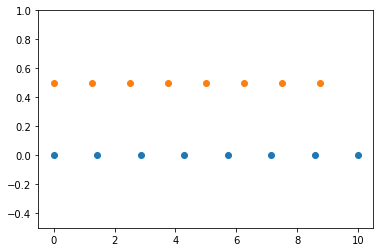

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
N = 8
y = np.zeros(N)
x1 = np.linspace(0, 10, N, endpoint=True)
x2 = np.linspace(0, 10, N, endpoint=False)
plt.plot(x1, y, 'o')

plt.plot(x2, y + 0.5, 'o')

plt.ylim([-0.5, 1])

plt.show()

## Trig functions

In [20]:
#array of angles
theta = np.linspace(0, np.pi, 3)

In [21]:
print("sin(theta) = ", np.sin(theta))

sin(theta) =  [  0.00000000e+00   1.00000000e+00   1.22464680e-16]


Also have: 
```python
np.cos(theta)
np.tan(theta)
np.arcsin(theta)
np.arccos(theta)
np.arctan(theta)
```

## Exponents and Logarithms

In [22]:
x = [1, 2, 3]
print("x     = ", x)
print("e^x   = ", np.exp(x))
print("2^x   = ", np.exp2(x))
print("3^x   = ", np.power(3, x))

x     =  [1, 2, 3]
e^x   =  [  2.71828183   7.3890561   20.08553692]
2^x   =  [ 2.  4.  8.]
3^x   =  [ 3  9 27]


For logarithms we have ``np.log(x)`` for ln(x). log base 2 is ``log2(x)`` and log base 10 is ``log10(x)``

## Scipy.special ufuncs

contains many specialized and obscure ufuncs to use on np arrays, like converting to radians from degrees, rounding and remainders, gamma functions, beta functions, etc

### Ufuncs special features 
specify where the output of a function is stored by passing argument ``out = VarName``
<br> 
This allows you to pass to specific parts of a pre-allocated array

In [23]:
x = np.arange(5)
y = np.zeros(10)
np.power(2, x, out=y[::2])
print(y)

[  1.   0.   2.   0.   4.   0.   8.   0.  16.   0.]


This seems like something we could do with simple ``y[::2] = x^2`` but that actually creates a tempory array to copy to and from. Specifying the output in the ufunc transfers directly

In [24]:
x = np.arange(1, 6)
x

array([1, 2, 3, 4, 5])

## Aggregation
using a ``.reduce`` method on a ufunc applies the operation iteratively on all elements of the array

In [26]:
np.add.reduce(x)

15

In [27]:
np.sum(x)

15

In [28]:
np.multiply.reduce(x)

120

To do the same as above but also store the intermediate results, use ``operation.aggregate(x)``

In [29]:
np.add.accumulate(x)

array([ 1,  3,  6, 10, 15])

In [30]:
np.multiply.accumulate(x)

array([  1,   2,   6,  24, 120])

## Output of operation on all pairs of 2 input arrays

In [31]:
x = np.arange(1, 6)
np.multiply.outer(x, x)

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

In [38]:
y = np.array([1, 1/5, 2/5, 3/5, 4/5])
np.multiply.outer(x, y)

array([[ 1. ,  0.2,  0.4,  0.6,  0.8],
       [ 2. ,  0.4,  0.8,  1.2,  1.6],
       [ 3. ,  0.6,  1.2,  1.8,  2.4],
       [ 4. ,  0.8,  1.6,  2.4,  3.2],
       [ 5. ,  1. ,  2. ,  3. ,  4. ]])

### End 01/15/2018